**Agnieszka Grzymska**              
nr albumu 148295 <br>
grupa I5.1, Informatyka

## 1. Opis zbioru

Dane dotyczą wynajmu rowerów przez fikcyjną firmę Cyclistic w okresie od kwietnia 2021 do marca 2022.<br>
Zbiory zawierają informacje o numerach identyfikacyjnych przejażdżek, typach wypożyczonych rowerów, datach wypożyczenia i oddania rowerów oraz nazwy, numery identyfikacyjne i współrzędne geograficzne stacji początkowych oraz końcowych.<br>
Łącznie w 12 tabelach znajdują się 5723532 wpisy.<br>
Dane pochodzą z obserwacji.

Źródło:
https://www.kaggle.com/datasets/evangower/cyclistic-bike-share

## 2. Analiza eksploracyjna

Dwoma głównymi typami wypożyczanych rowerów są **rower klasyczny** (56.7 % wszystkich wpisów) i **rower elektryczny** (37.9 %). <br>
Przeprowadziłam analizę średnich czasów wypożyczenia obydwu rodzajów roweru, a następnie przetestowałam, czy jeden z nich ma średnio dłuższy czas.

Najpierw wczytuję dane oraz przygotowuję funkcję zwracającą dla danego miesiąca wektor czasów wypożyczeń.

In [1]:
april_21 <- read.csv("202104-divvy-tripdata.csv")
may_21 <- read.csv("202105-divvy-tripdata.csv")
june_21 <- read.csv("202106-divvy-tripdata.csv")
july_21 <- read.csv("202107-divvy-tripdata.csv")
august_21 <- read.csv("202108-divvy-tripdata.csv")
september_21 <- read.csv("202109-divvy-tripdata.csv")
october_21 <- read.csv("202110-divvy-tripdata.csv")
november_21 <- read.csv("202111-divvy-tripdata.csv")
december_21 <- read.csv("202112-divvy-tripdata.csv")
january_22 <- read.csv("202201-divvy-tripdata.csv")
february_22 <- read.csv("202202-divvy-tripdata.csv")
march_22 <- read.csv("202203-divvy-tripdata.csv")

In [2]:
calculate_time <- function(month) {
    end <- as.POSIXct(month$ended_at, format="%Y-%m-%d %H:%M:%S", tz="UTC")
    start <- as.POSIXct(month$started_at, format="%Y-%m-%d %H:%M:%S", tz="UTC")
    time <- as.numeric(difftime(end,start), units="secs")
}

Następnie tworzę dwie listy zawierające czasy w konkretnych miesiącach dla roweru klasycznego i elektrycznego.<br>
Na ich podstawie liczę średnie z każdego miesiąca. Tworzę też wektory liczby wypożyczeń każdego z dwóch rodzajów roweru.

In [3]:
total_list <- list(april_21, may_21, june_21, july_21, august_21, september_21, october_21, november_21,
                  december_21, january_22, february_22, march_22)

classic_times <- list()
for (i in 1:12) {
    classic_times[[i]] <- calculate_time(subset(total_list[[i]], 
                                                rideable_type == "classic_bike"))
}

electric_times <- list()
for (i in 1:12) {
    electric_times[[i]] <- calculate_time(subset(total_list[[i]], 
                                                 rideable_type == "electric_bike"))
}

In [4]:
classic_monthly_avg <- vector()
for (i in 1:12) {
    classic_monthly_avg <- c(classic_monthly_avg, mean(unlist(classic_times[i])))
}

electric_monthly_avg <- vector()
for (i in 1:12) {
    electric_monthly_avg <- c(electric_monthly_avg, mean(unlist(electric_times[i])))
}

In [5]:
classic_monthly_rents <- vector()
for (i in 1:12) {
    classic_monthly_rents <- c(classic_monthly_rents, length(unlist(classic_times[i])))
}

electric_monthly_rents <- vector()
for (i in 1:12) {
    electric_monthly_rents <- c(electric_monthly_rents, length(unlist(electric_times[i])))
}

Korzystając z wyliczonych wektorów tworzę wykresy porównujące średnie czasy wypożyczenia oraz liczbę wypożyczeń roweru klasycznego i elektrycznego.

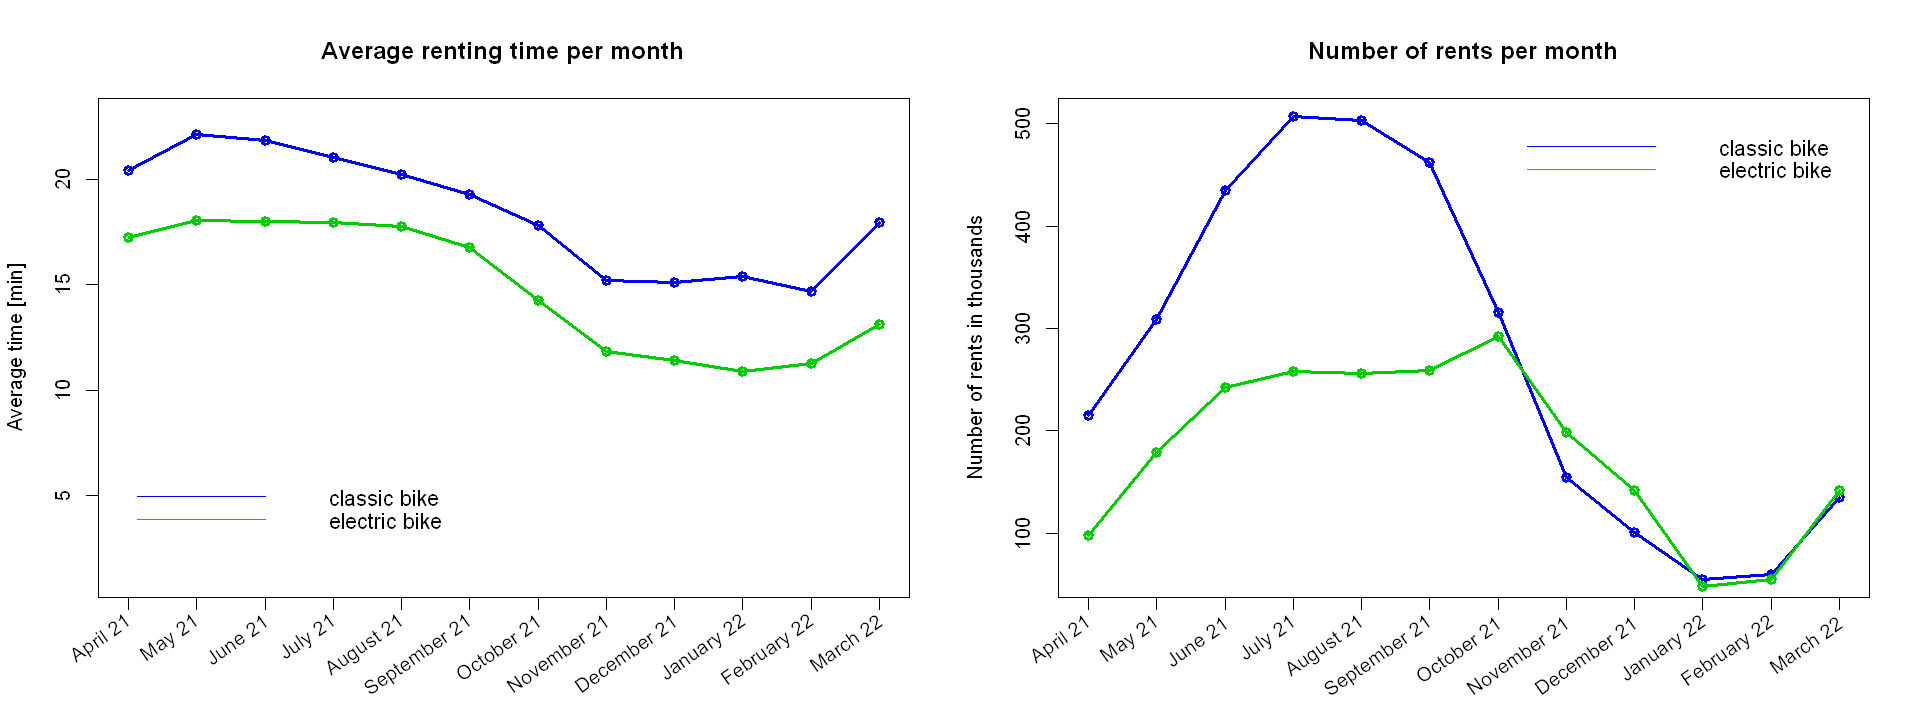

In [6]:
months = c("April 21", "May 21", "June 21", "July 21", "August 21", "September 21", 
           "October 21", "November 21","December 21", "January 22", "February 22", "March 22")

par(mfrow=c(1,2))
options(repr.plot.width=16, repr.plot.height=6)

plot(classic_monthly_avg/60, type = "o", col = "blue", main = "Average renting time per month",
     xaxt = "n", xlab = "", ylab = "Average time [min]", lwd = 3, ylim = c(1,23))
lines(electric_monthly_avg/60, type = "o", col = "green3", lwd = 3)
axis(1, 1:12, labels = FALSE) 
text(x = 1:12,
     y = par("usr")[3] - 1,
     labels = months,
     xpd = NA,
     srt = 35,
     adj = 1)
legend(0.2,6,legend=c("classic bike","electric bike"),col=c("blue", "green3"),lty=1:1, cex=1.1,
       bty='n', box.lwd=0)

plot(classic_monthly_rents/1000, type = "o", col = "blue", main = "Number of rents per month", 
     xaxt = "n", xlab = "", ylab = "Number of rents in thousands", lwd = 3)
lines(electric_monthly_rents/1000, type = "o", col = "green3", lwd = 3)
axis(1, 1:12, labels = FALSE) 
text(x = 1:12,
     y = par("usr")[3] - 22,
     labels = months,
     xpd = NA,
     srt = 35,
     adj = 1)
legend(6.5,500,legend=c("classic bike","electric bike"),col=c("blue", "green3"),lty=1:1, 
       cex=1.1, bty='n', box.lwd=0)

Jak widać, rower klasyczny jest średnio wypożyczany na dłużej. <br>
Z wyjątkiem miesięcy zimowych jest również wybierany znacznie częściej od elektrycznego.

Do sprawdzenia poprawności wniosków z testu statystycznego potrzebować będę średniego czasu przejazdu rowerem klasycznym i elektrycznym.

In [7]:
classic_renting_times <- unlist(classic_times)
electric_renting_times <- unlist(electric_times)

Funkcja ```sd()``` wylicza odchylenie standardowe w próbce, dlatego w przypadku populacji mnożę wynik przez 
$\sqrt{\frac{n-1}{n}}$.

In [8]:
classic_avg = mean(classic_renting_times)
classic_sd <- sd(classic_renting_times)
                *(sqrt((length(classic_renting_times)-1)/length(classic_renting_times)))
cat("Średni czas wypożyczania roweru klasycznego:", classic_avg, 
    "min z odchyleniem standardowym", classic_sd, "min.\n")

electric_avg = mean(electric_renting_times)
electric_sd <- sd(electric_renting_times)
                *(sqrt((length(electric_renting_times)-1)/length(electric_renting_times)))
cat("Średni czas wypożyczania roweru elektrycznego:", electric_avg, 
    "min z odchyleniem standardowym", electric_sd, "min.")

Średni czas wypożyczania roweru klasycznego: 1184.347 min z odchyleniem standardowym 3297.516 min.
Średni czas wypożyczania roweru elektrycznego: 939.2228 min z odchyleniem standardowym 1202.942 min.

## 3. Test statystyczny

Zamierzam sprawdzić, czy średni czas jazdy jest dłuższy dla roweru klasycznego względem roweru elektrycznego.<br>
W tym celu przeprowadzę test Z dla dwóch populacji niezależnych.<br>
Jako, że posiadam już dane o całej populacji, wylosuję z niej po 1000 wpisów dla każdego rodzaju roweru i na jej podstawie przeprowadzę test.<br>
Rozmiar próby jest na tyle duży, że na podstawie Centralnego Twierdzenia Klasycznego można uznać, że liczona średnia pochodzi z rozkładu normalnego.

In [9]:
n <- 1000
classic_sample <- sample(classic_renting_times, n)
electric_sample <- sample(electric_renting_times, n)

Do przeprowadzenia testu konieczne będzie wyznaczenie średnich i odchyleń standardowych obydwu próbek.

In [10]:
classic_sample_avg <- mean(classic_sample)
classic_sample_sd <- sd(classic_sample)

electric_sample_avg <- mean(electric_sample)
electric_sample_sd <- sd(electric_sample)

cat("Średni czas wypożyczenia roweru klasycznego:", classic_sample_avg, 
    "s z odchyleniem standardowym", classic_sample_sd, "s.\n")
cat("Średni czas wypożyczenia roweru elektrycznego:", electric_sample_avg, 
    "s z odchyleniem standardowym", electric_sample_sd, "s.")

Średni czas wypożyczenia roweru klasycznego: 1273.37 s z odchyleniem standardowym 4123.939 s.
Średni czas wypożyczenia roweru elektrycznego: 854.32 s z odchyleniem standardowym 868.4347 s.

 Zacznę od sformułowania hipotezy zerowej i alternatynej. 
 
$H_0: \mu_c = \mu_e$ - średni czas wypożyczenia roweru klasyczego i elektrycznego jest równy <br>
$H_A: \mu_c > \mu_e$ - średni czas wypożyczenia roweru klasyczego jest większy od elektrycznego <br>

Następnie, wyznaczę zbiór krytyczny dla poziomu istotności $\alpha = 0.01$

Zbiór krytyczny: $(2.326; +\infty)$

In [11]:
qnorm(0.01)

[1] -2.326348

Pozostaje obliczenie wartości statystyki Z, co zrobię korzystając ze wzoru: <br>
$Z_{\bar{X_1} - \bar{X_2}} = \frac{(\bar{X_1} - \bar{X_2}) - (\mu_1 - \mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$

In [12]:
Z <- (classic_sample_avg - electric_sample_avg)/sqrt((classic_sample_sd^2 + electric_sample_sd^2)/n)
cat("Wartość statystyki Z:", round(Z,3))

Wartość statystyki Z: 3.144

#### Wnioski
Otrzymana wartość Z należy do zbioru krytycznego, w związku z czym **możemy odrzucić hipotezę zerową i zaakceptować hipotezę alternatywną**.<br>
Jako, że wartości średnich czasów dla obydwu typów roweru są nam znane, możemy zauważyć, że przeprowadzony test doprowadził do poprawnych wniosków.